In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_lfw_people

In [3]:
class KnnClassifier():
    def __init__(self):
        self.neigh = None
        self.n_neighbors = None

    def train(self, X, y):
        """
        Fits the k-nearest neighbors classifier from the training dataset.
        
        Params: X: input variable
                y: output vector
        """
        self.neigh.fit(X, y)


    def pred(self, X):
        "Predicts the class labels for the provided data."
        
        return self.neigh.predict(X)

    def accuracy(self, X, y):
        "Returns the mean accuracy on the given test data and labels."
        return self.neigh.score(X, y)
    
    

# PCA

In [5]:
class DimensionalityReductor():
    def __init__(self, X):
        self.X = X
        
    def reduce(self, n_dim):
        #TODO: Nothing - Skip to next part.
        return NotImplemented


class PCADimensionalityReductor(DimensionalityReductor):
    def __init__(self, X):
        super().__init__(X)
        # Sorting eigen values
        mean_vec = np.mean(X, axis=0)
        self.centralized_x = self.X - mean_vec
        cov_mat = (1 / (self.centralized_x.shape[0])) * (np.dot(self.centralized_x.T, self.centralized_x))
        eig_values, eig_vectors = np.linalg.eig(cov_mat)
        self.idx = np.argsort(eig_values)[::-1]
        self.eig_vectors = eig_vectors[:, self.idx]

    def reduce(self, n_dim):
        """
        Returns a modified dataset with n_dim features computed based on the area of high variance
        """
        return self.centralized_x.dot(self.eig_vectors[:, :n_dim])


# Load Dataset

# The dataset that will be used in this assignment was adapted from the LFW Face Database (http://vis-www.cs.umass.edu/lfw/)

In [7]:
# dataset = fetch_lfw_people(min_faces_per_person=100)
dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.2)

# Investigate dataset

In [8]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [9]:
dataset['target'][:20]

array([2, 3, 1, 4, 1, 0, 2, 0, 2, 1, 3, 0, 2, 2, 4, 3, 2, 2, 2, 2],
      dtype=int64)

In [13]:
dataset['target_names']

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [18]:
# Retrieve the shape of the image from the images attribute and store the height as h and w as width
h = dataset['images'].shape[1]
w = dataset['images'].shape[2]

# Retrieve the features into the X array, the output to the y array and the target names into target_names
X = dataset['data']
y = dataset['target']
target_names = dataset['target_names']

# Let's convert our data to NumPy array before continuing
X = np.array(X)
y = np.array(y)

# Declare the objects that we need 
pca_dr = PCADimensionalityReductor(X)
kc = KnnClassifier()
# Classifier implementing the k-nearest neighbors algorithm.   
neigh = KNeighborsClassifier(n_neighbors=3)

pca_dr = PCADimensionalityReductor(X)


# plot_gallery and titles are helper functions that we will use for the visualization of the face recognition
# plot_gallery is used to make a subplot of the original images
# titles is used to annotate these images with the predicted and the actual names of the people in the images
def plot_gallery(images, titles, h, w, rows, cols):
    plt.figure(figsize = (10, 14))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        plt.subplots_adjust(hspace = 1.0, wspace = 1.0)

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        actual_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\nactual: {1}'.format(pred_name, actual_name)

        #we are going to use the 100 most important features
feat100 = pca_dr.reduce(100)
X_train, X_test, y_train, y_test = train_test_split(feat100, y, test_size=0.2, random_state=32) 
knn = KnnClassifier()
knn.neigh = neigh
knn.train(X_train, y_train)
pred = knn.pred(X_test)
score = knn.neigh.score(X_test, y_test)

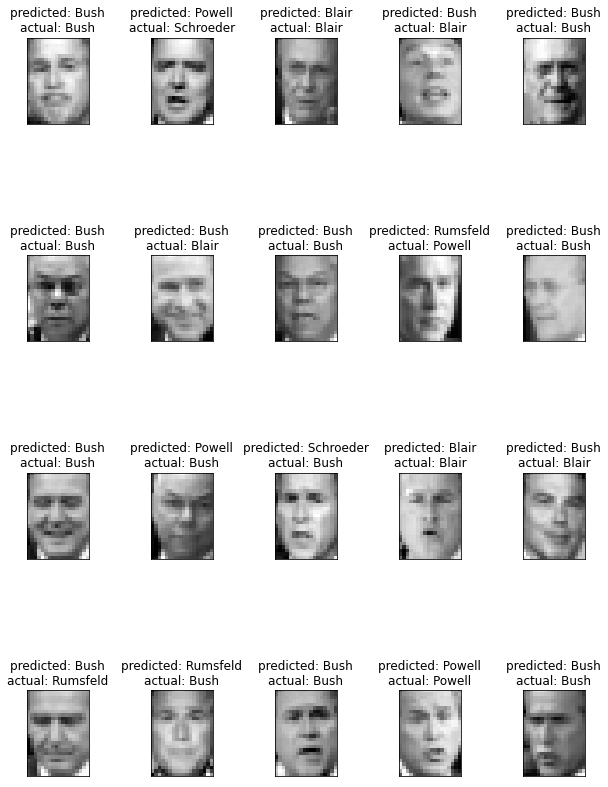

In [19]:
#Make a subplot for the first 20 images with their annotations using the helper functions provided 
targets = list(titles(pred, y_test, target_names))[:20]
plot_gallery(X[:20], targets, h, w, 4,5)

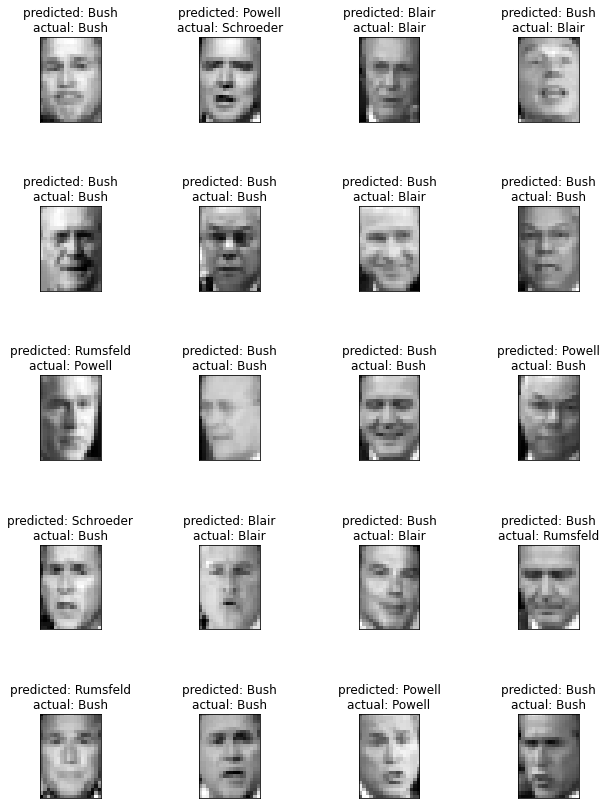

In [21]:
# Do steps 1 to 3 with the full dataset without performing PCA reduction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) 
knn = KnnClassifier()
knn.neigh = neigh
knn.train(X_train, y_train)
score = knn.neigh.score(X_test, y_test)
# Call the titles function to get the annotations for the images
# Call the plot_gallery function to plot the images with their annotations
# Hint: The output of the titles function has to be casted as a list before being passed into the plot_gallery function
targets =list(titles(pred, y_test, target_names))
plot_gallery(X, targets, h, w, 5, 4)